In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [42]:
dataset = pd.read_csv("IRIS.csv")

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [46]:
dataset["species"], classification = pd.factorize(dataset["species"])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


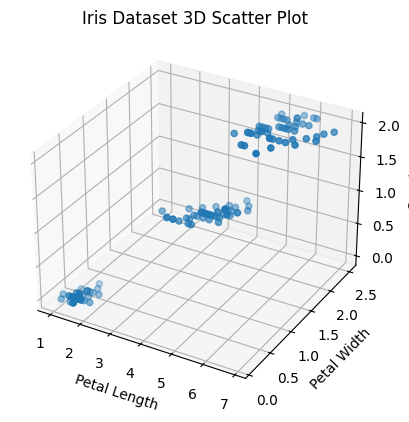

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.scatter3D(dataset.petal_length, dataset.petal_width, dataset.species)
plt.title("Iris Dataset 3D Scatter Plot")
axis.set_xlabel("Petal Length")
axis.set_ylabel("Petal Width")
axis.set_zlabel("Species")
plt.show()

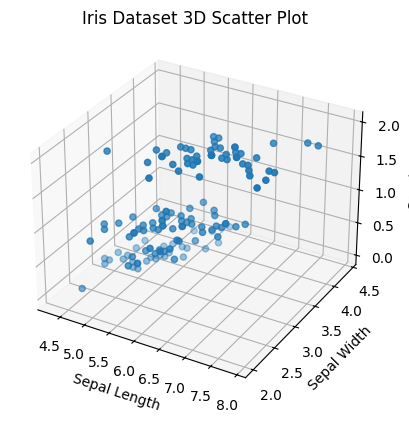

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.scatter3D(dataset.sepal_length, dataset.sepal_width, dataset.species)
plt.title("Iris Dataset 3D Scatter Plot")
axis.set_xlabel("Sepal Length")
axis.set_ylabel("Sepal Width")
axis.set_zlabel("Species")
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

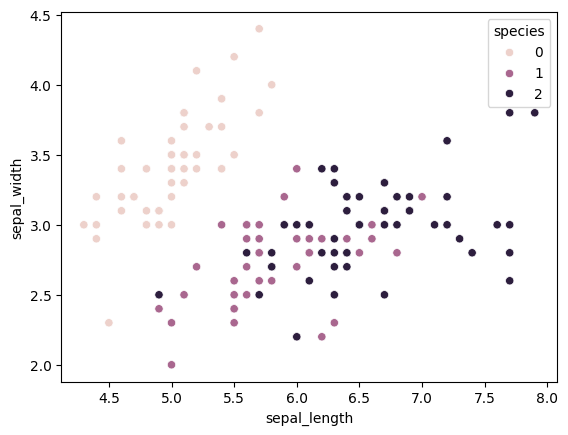

In [49]:
sns.scatterplot(dataset, hue="species", x="sepal_length", y="sepal_width")

<Axes: xlabel='petal_length', ylabel='petal_width'>

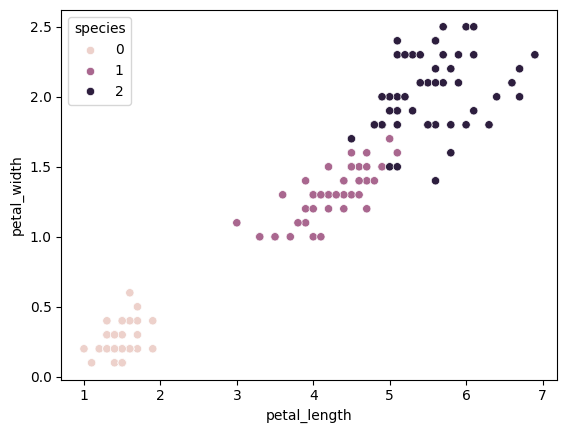

In [50]:
sns.scatterplot(dataset, hue="species", x="petal_length", y="petal_width")

In [51]:
k_rng = range(1,10)
sse=[]

for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset[["sepal_length", "sepal_width"]])
    sse.append(kmeans.inertia_)

In [52]:
sse

[130.18093333333337,
 57.98240604207879,
 37.12370212765957,
 27.96217117808865,
 21.19204649688936,
 17.254467700926522,
 15.673798319327727,
 13.285196177944865,
 12.08772158112673]

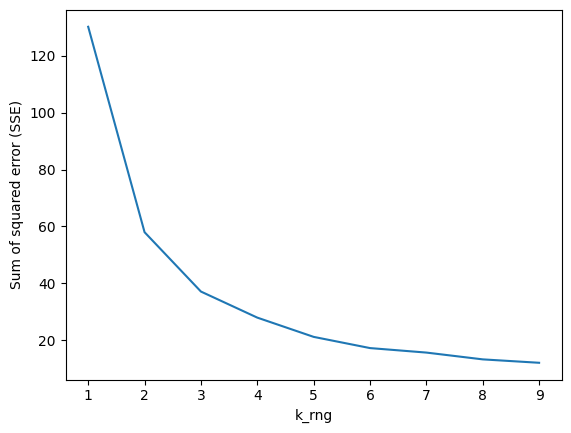

In [53]:
plt.xlabel("k_rng")
plt.ylabel("Sum of squared error (SSE)")
plt.plot(k_rng, sse)

In [54]:
k_rng = range(1,10)
sse=[]

for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset[["petal_length", "petal_width"]])
    sse.append(kmeans.inertia_)

In [55]:
sse

[550.6434666666669,
 86.40394533571003,
 31.42928566827698,
 19.51965690760389,
 14.717512010796225,
 11.161310892042017,
 9.635909356725145,
 8.407504485852314,
 7.029406088459931]

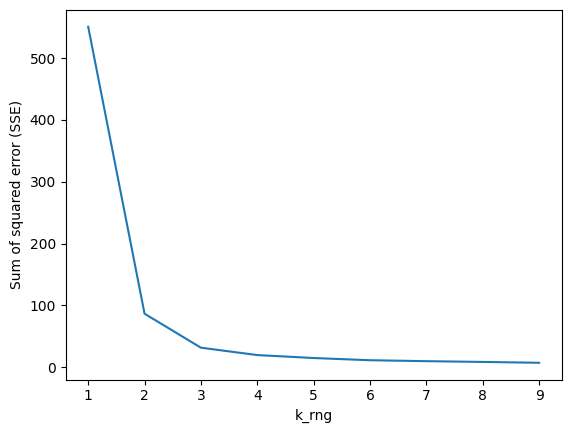

In [56]:
plt.xlabel("k_rng")
plt.ylabel("Sum of squared error (SSE)")
plt.plot(k_rng, sse)

In [57]:
km = KMeans(n_clusters=3, random_state=0)
y_pred = km.fit_predict(dataset[["petal_length", "petal_width"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [58]:
dataset["cluster"] = y_pred
dataset.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,0
96,5.7,2.9,4.2,1.3,1,0
97,6.2,2.9,4.3,1.3,1,0
98,5.1,2.5,3.0,1.1,1,0


In [61]:
cm = confusion_matrix(dataset.species, dataset.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

Text(0, 0.5, 'True label')

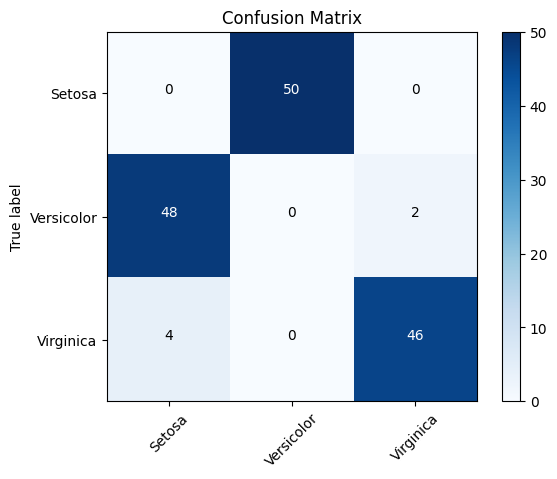

In [67]:
true_labels = dataset.species
predicted_labels = dataset.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ["Setosa", "Versicolor", "Virginica"]

plt.imshow(cm, cmap=plt.cm.Blues, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.ylabel("True label")